In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
train_df = pd.read_csv("train_set.csv")
predict_df = pd.read_csv("test_set.csv")
predict_df

,id_img,path
0,18341,to_pred/18341.jpg
1,13176,to_pred/13176.jpg
2,23945,to_pred/23945.jpg
3,15968,to_pred/15968.jpg
4,18382,to_pred/18382.jpg
...,...,...
4112,8966,to_pred/08966.jpg
4113,12111,to_pred/12111.jpg
4114,16629,to_pred/16629.jpg
4115,24322,to_pred/24322.jpg


In [3]:
train_labels = train_df["label"].values

In [4]:
train_labels.shape

(6176,)

In [5]:
train = []
for elem in train_df.path:
    path = "totrain/totrain/"+elem
    train.append(cv2.imread(path))

train = np.array(train)
train.shape

(6176, 48, 48, 3)

In [6]:
to_pred = []
for elem in predict_df.path:
    path = "to_pred/"+elem
    to_pred.append(cv2.imread(path))

to_pred = np.array(to_pred)

In [7]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

train_images_grey = grayscale(train)
pred_images_grey = grayscale(to_pred)

In [8]:
print(train_images_grey.shape)
pred_images_grey.shape

(6176, 48, 48, 1)


(4117, 48, 48, 1)

In [9]:
print(train_images_grey.shape)
train_labels.shape

(6176, 48, 48, 1)


(6176,)

In [10]:
img_to_show = train_images_grey.reshape(train_images_grey.shape[0], 48, 48)

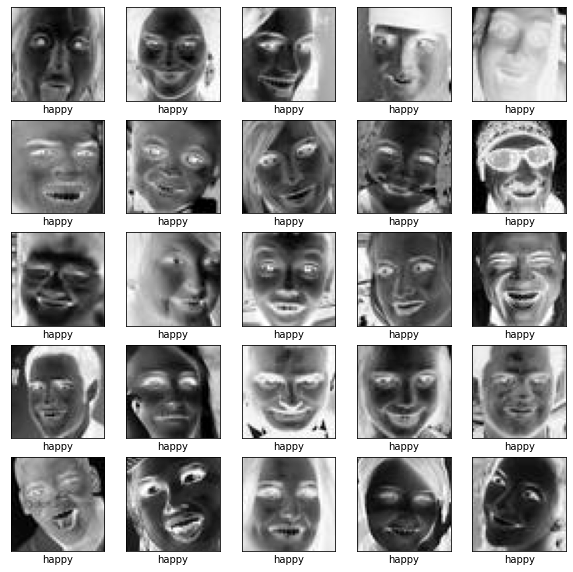

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_to_show[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [10]:
train_images_grey = train_images_grey / 255.0

pred_images_grey = pred_images_grey / 255.0

In [11]:
train_images_grey.shape

(6176, 48, 48, 1)

In [12]:
pred_images_grey.shape

(4117, 48, 48, 1)

In [13]:
le = preprocessing.LabelEncoder()
train_labels = le.fit_transform(train_labels)

train_labels.shape

(6176,)

In [15]:
#Dividing train data in train and test data
x_train, x_test, y_train, y_test = train_test_split(train_images_grey, train_labels, test_size=0.2, stratify=train_labels, random_state=123)


In [15]:
#skf = StratifiedKFold(n_splits=10, shuffle=True)

#for i_train, i_valid in skf.split(train_images_grey, train_labels):

    X_train = train_images_grey[i_train]
    y_train = train_labels[i_train]

    X_valid = train_images_grey[i_valid]
    y_valid = train_labels[i_valid]

    print('X_train:', X_train.shape, X_train.dtype)
    print('y_train:', y_train.shape, y_train.dtype)

    print('X_valid:', X_valid.shape, X_valid.dtype)
    print('y_valid:', y_valid.shape, y_valid.dtype)

X_train: (5558, 48, 48, 1) float32
y_train: (5558,) int32
X_valid: (618, 48, 48, 1) float32
y_valid: (618,) int32
X_train: (5558, 48, 48, 1) float32
y_train: (5558,) int32
X_valid: (618, 48, 48, 1) float32
y_valid: (618,) int32
X_train: (5558, 48, 48, 1) float32
y_train: (5558,) int32
X_valid: (618, 48, 48, 1) float32
y_valid: (618,) int32
X_train: (5558, 48, 48, 1) float32
y_train: (5558,) int32
X_valid: (618, 48, 48, 1) float32
y_valid: (618,) int32
X_train: (5558, 48, 48, 1) float32
y_train: (5558,) int32
X_valid: (618, 48, 48, 1) float32
y_valid: (618,) int32
X_train: (5558, 48, 48, 1) float32
y_train: (5558,) int32
X_valid: (618, 48, 48, 1) float32
y_valid: (618,) int32
X_train: (5559, 48, 48, 1) float32
y_train: (5559,) int32
X_valid: (617, 48, 48, 1) float32
y_valid: (617,) int32
X_train: (5559, 48, 48, 1) float32
y_train: (5559,) int32
X_valid: (617, 48, 48, 1) float32
y_valid: (617,) int32
X_train: (5559, 48, 48, 1) float32
y_train: (5559,) int32
X_valid: (617, 48, 48, 1) floa

----------------------------------------

In [47]:
tf.config.run_functions_eagerly(True)

INPUT_SHAPE = (48,48,1)

model = keras.models.Sequential()

model.add(keras.layers.Dense(units=30, activation="relu", input_shape=INPUT_SHAPE))

model.add(keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid"))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters=20, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid"))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid"))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Dense(units=30, activation="relu"))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dropout(rate=0.25))

model.add(keras.layers.Dense(units=10, activation="relu"))

# 1 capa convolutiva con 8 neuronas & 1 MaxPool quedando las dimensiones de la imagen a la mitad
#model.add(keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE)))

#model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

#1 dropout 0.25
#model.add(keras.layers.Dropout(rate=0.25))

#1 Flatten
#model.add(keras.layers.Flatten())

#1 dense con 32 neuronas
#model.add(keras.layers.Dense(units=20))

#model.add(keras.layers.Dropout(rate=0.25))

#model.add(keras.layers.Dense(units=10))


# 1 dense con 10 (salida)
model.add(keras.layers.Dense(units=2, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 48, 48, 30)        60        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 10)        2710      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 10)        0         
_________________________________________________________________
dense_16 (Dense)             (None, 23, 23, 30)        330       
_________________________________________________________________
flatten_2 (Flatten)          (None, 15870)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15870)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [17]:
INPUT_SHAPE = (48,48,1)

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

#1 dropout 0.25
model.add(keras.layers.Dropout(rate=0.25))

#1 Flatten
model.add(keras.layers.Flatten())

#1 dense con 32 neuronas
model.add(keras.layers.Dense(units=32, activation="relu"))

# 1 dense con 10 (salida)
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                123936    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 124,474
Trainable params: 124,474
Non-trainable params: 0
__________________________________________________

In [18]:
model.compile(optimizer='adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['categorical_accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=6)

In [19]:
%%time 

history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[callback], verbose=1)

Epoch 1/50
155/155 [==============================] - 2s 15ms/step - loss: 2.2706 - categorical_accuracy: 0.1581 - val_loss: 2.2303 - val_categorical_accuracy: 0.4320
Epoch 2/50
155/155 [==============================] - 2s 14ms/step - loss: 2.1965 - categorical_accuracy: 0.5334 - val_loss: 2.1467 - val_categorical_accuracy: 0.9231
Epoch 3/50
155/155 [==============================] - 2s 13ms/step - loss: 2.1112 - categorical_accuracy: 0.8154 - val_loss: 2.0521 - val_categorical_accuracy: 0.9887
Epoch 4/50
155/155 [==============================] - 2s 14ms/step - loss: 2.0060 - categorical_accuracy: 0.9275 - val_loss: 1.9372 - val_categorical_accuracy: 0.9943
Epoch 5/50
155/155 [==============================] - 2s 16ms/step - loss: 1.8771 - categorical_accuracy: 0.9340 - val_loss: 1.7947 - val_categorical_accuracy: 0.9951
Epoch 6/50
155/155 [==============================] - 3s 20ms/step - loss: 1.7231 - categorical_accuracy: 0.9287 - val_loss: 1.6320 - val_categorical_accuracy: 0.991

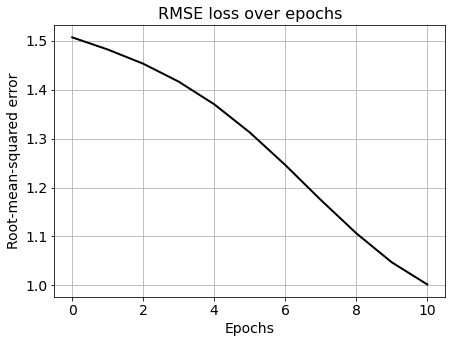

In [20]:
plt.figure(figsize=(7,5))
plt.title("RMSE loss over epochs",fontsize=16)
plt.plot(np.sqrt(model.history.history['loss']),c='k',lw=2)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Root-mean-squared error",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [27]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

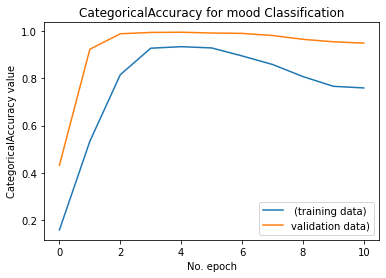

In [21]:
plt.plot(history.history['categorical_accuracy'], label=' (training data)')
plt.plot(history.history['val_categorical_accuracy'], label='validation data)')
plt.title('CategoricalAccuracy for mood Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

39/39 - 0s - loss: 0.9626 - categorical_accuracy: 0.9490

Test accuracy: 0.9490291476249695


------------------

## Predict

In [24]:
predictions = model.predict(pred_images_grey)
predict_results = predictions.argmax(axis=1)
predict_results

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [25]:
label = le.inverse_transform(predict_results)

In [26]:
sample = pd.read_csv("sample_submission.csv")

In [27]:
predict_df["label"] = label
submission = predict_df

In [28]:
submission.label.unique()

array(['happy', 'sadness'], dtype=object)

In [29]:
submission

,id_img,path,label
0,18341,to_pred/18341.jpg,happy
1,13176,to_pred/13176.jpg,happy
2,23945,to_pred/23945.jpg,happy
3,15968,to_pred/15968.jpg,happy
4,18382,to_pred/18382.jpg,happy
...,...,...,...
4112,8966,to_pred/08966.jpg,happy
4113,12111,to_pred/12111.jpg,happy
4114,16629,to_pred/16629.jpg,happy
4115,24322,to_pred/24322.jpg,sadness


In [30]:
submission.drop("path", axis=1, inplace=True)

In [31]:
submission

,id_img,label
0,18341,happy
1,13176,happy
2,23945,happy
3,15968,happy
4,18382,happy
...,...,...
4112,8966,happy
4113,12111,happy
4114,16629,happy
4115,24322,sadness


In [32]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id_img.all() == sample.id_img.all():
            print("you're ready to submit!")
            submission.to_csv("9_try_to_submit.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
